In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
data = pd.read_csv('breast_cancer.csv', delimiter=',')
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [4]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
data['Class'] = data['Class'].replace({2: 0, 4: 1})
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
print(y)
print(X)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

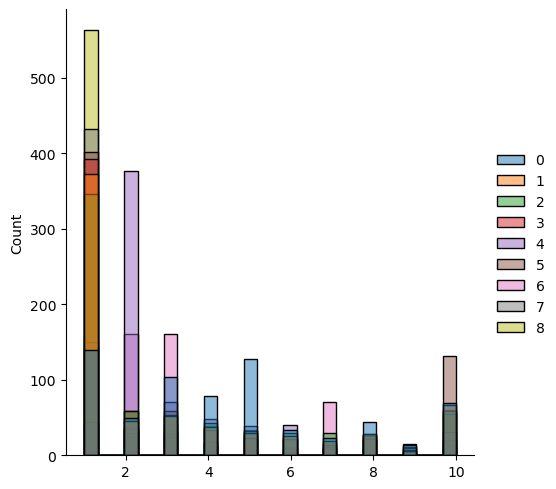

In [6]:
sns.displot(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p = 2).fit(X_train, y_train) # Número de vizinhos 5- p = 2 equivlae a distância Euclidiana

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred) 
print(cm)

[[84  3]
 [ 1 49]]


In [11]:
n_splits = 10 # Utilizadono último gráficopara mantesadivisão caso mude
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = n_splits)  # cv = número de dobras, retorna uma lista com os resultados
print(f"Acurácia 10 testes: {scores.mean()*100:.2f}%")
print(f"Desvio padrão 10 testes: {scores.std()*100:.2f}%")

Acurácia 10 testes: 97.44%
Desvio padrão 10 testes: 1.85%


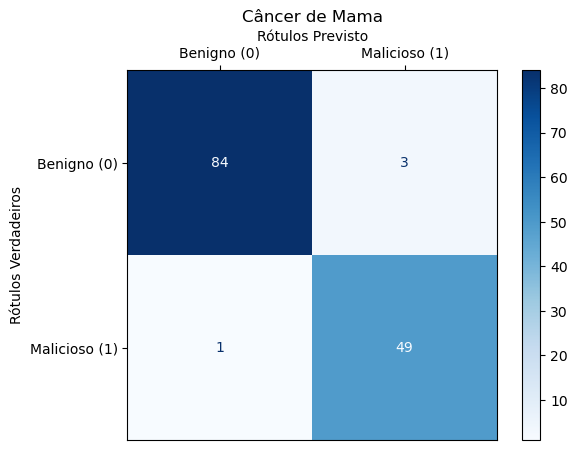

Acurácia: 97.08%


In [12]:
# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Benigno (0)', 'Malicioso (1)']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Câncer de Mama")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")

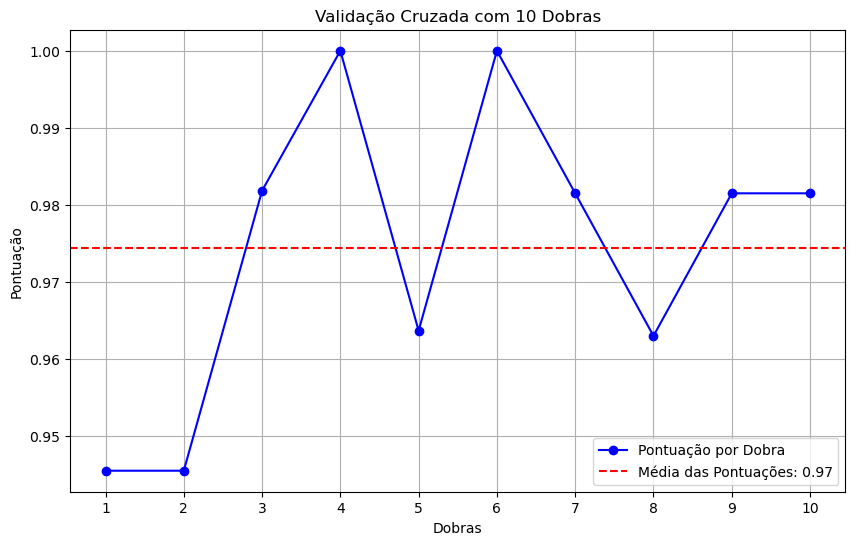

In [42]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(10, 6))

# Plota os scores para cada dobra, com marcadores e linha conectando os pontos
plt.plot(range(1, n_splits + 1), scores, marker='o', linestyle='-', color='b', label='Pontuação por Dobra')

# Adiciona uma linha horizontal que representa a média dos scores
plt.axhline(y=scores.mean(), color='r', linestyle='--', label=f'Média das Pontuações: {scores.mean():.2f}')

# Adiciona detalhes ao gráfico
plt.title('Validação Cruzada com 10 Dobras')  # Título do gráfico
plt.xlabel('Dobras')  # Rótulo do eixo X
plt.ylabel('Pontuação')  # Rótulo do eixo Y
plt.xticks(range(1, n_splits + 1))  # Define os ticks do eixo X de 1 a 10
plt.legend(loc='lower right')  # Adiciona a legenda no canto inferior direito
plt.grid(True)  # Ativa a grade no gráfico

# Exibe o gráfico
plt.show()